In [31]:
# ENME 808
# HW 3, Question 4
# Adrienne Rudolph

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

#Import the train and test data
trainData = pd.read_csv('mnist_train_binary (2) (1) (1).csv')
testData = pd.read_csv('mnist_test_binary (1) (1) (1).CSV')

#Parse the training and test data
xTrain = np.array(trainData.drop(columns='label'))
xTest = np.array(testData.drop(columns='label'))
yTrain = np.where(trainData['label'] == 1, 1, -1)
yTest = np.where(testData['label'] == 1, 1, -1)

#Shrink data down to 2 components
pca = PCA(n_components=2)
xTrain = pca.fit_transform(xTrain)
xTest = pca.transform(xTest)

#If testing with 3rd degree polynomial:
n = 3
poly = PolynomialFeatures(n)
X_train_p3 = poly.fit_transform(xTrain)
X_test_p3 = poly.transform(xTest)

# Turn into a vector to be used in signal calculation
xTrain = np.concatenate((np.ones((xTrain.shape[0],1)),xTrain),1)
xTest = np.concatenate((np.ones((xTest.shape[0],1)),xTest),1)


In [32]:
def LinReg(xTrain, yTrain):
    X = xTrain
    Y = yTrain

    X_trans = X.T
    X_trans_X = np.dot(X_trans, X)
    X_inverse = np.linalg.inv(X_trans_X)
    X_t = np.dot(X_inverse, X_trans)
    w_linear = np.dot(X_t, Y)

    # w0_lin = w_linear[0]
    # w1_lin = w_linear[1]
    # w2_lin = w_linear[2]
    # w = [w0_lin, w1_lin, w2_lin]
    return w_linear

w = LinReg(X_train_p3, yTrain)

In [38]:
def predict(x):
    global w
    return np.sign(np.dot(x,w))

def update_weights(pred,true,input):
    global w
    if pred * true < 1:
        w += (true - pred) * input

In [39]:
pred = predict(X_train_p3)
w_best = w
E_best = np.sum(predict(X_train_p3) != yTrain)
for _ in range(10):
    for i in range(X_train_p3.shape[0]):
        pred = predict(X_train_p3[i,:])
        update_weights(pred,yTrain[i],X_train_p3[i,:])
        new_acc = np.sum(predict(X_train_p3) != yTrain)
        if new_acc < E_best:
            w_best = w
            E_best = new_acc
w = w_best


In [40]:
## Only use for polynomial portion
x1 = np.linspace(np.min(xTrain[:,1]), np.max(xTrain[:,1]),1000)
x2 = np.linspace(np.min(xTrain[:,2]), np.max(xTrain[:,2]),1000)
px, py = np.meshgrid(x1, x2)

cx = poly.transform(np.stack((px.flatten(), py.flatten()), 1))
cy = predict(cx)

In [8]:
# print(w)
# w0 = w[0]
# w1 = w[1]
# w2 = w[2]

# z = np.linspace(-1000,2000)
# zSlope = -w1 / w2
# zIntercept = -w0 / w2


In [9]:
## Use for Regular Regression/Pocket
# plt.plot(z, zSlope*z+zIntercept, color='purple', label='Linear Reg Line')
# plt.scatter(xTrain[yTrain==1][:,1],xTrain[yTrain==1][:,2], color='red')
# plt.scatter(xTrain[yTrain!=1][:,1],xTrain[yTrain!=1][:,2], color='blue')
# plt.title('Linear Regression - Training Dataset')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()

# plt.plot(z, zSlope*z+zIntercept, color='purple', label='Linear Reg Line')
# plt.scatter(xTest[yTest==1][:,1],xTest[yTest==1][:,2], color='red')
# plt.scatter(xTest[yTest!=1][:,1],xTest[yTest!=1][:,2], color='blue')
# plt.title('Linear Regression - Testing Dataset')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


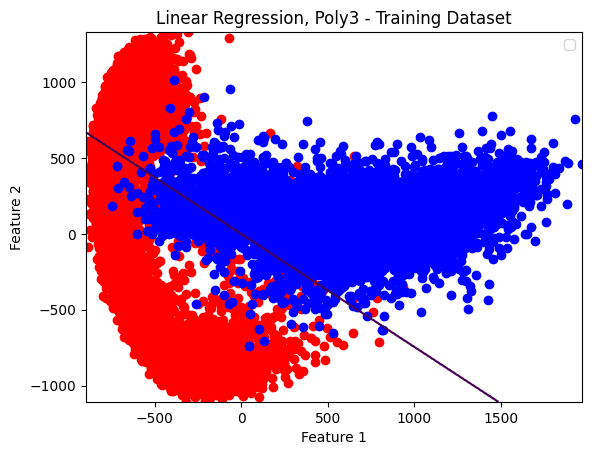

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


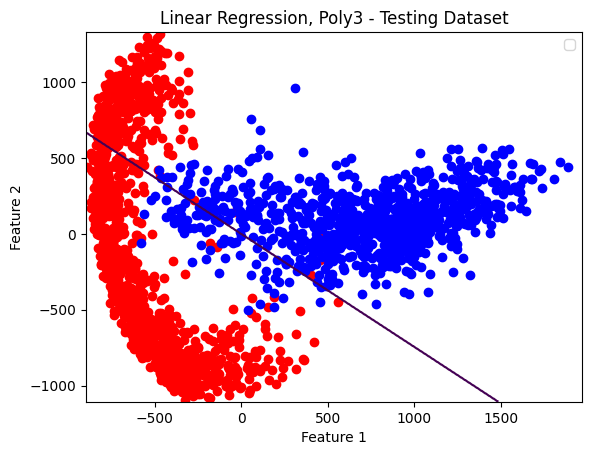

In [41]:
## This is for polynomial 3 plotting
plt.contour(px, py, cy.reshape(x1.shape[0], -1),levels=[0])
plt.scatter(xTrain[yTrain==1][:,1],xTrain[yTrain==1][:,2], color='red')
plt.scatter(xTrain[yTrain!=1][:,1],xTrain[yTrain!=1][:,2], color='blue')
plt.title('Linear Regression, Poly3 - Training Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

plt.contour(px, py, cy.reshape(x1.shape[0], -1),levels=[0])
plt.scatter(xTest[yTest==1][:,1],xTest[yTest==1][:,2], color='red')
plt.scatter(xTest[yTest!=1][:,1],xTest[yTest!=1][:,2], color='blue')
plt.title('Linear Regression, Poly3 - Testing Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [42]:
E_test_in = np.sum(predict(X_test_p3) != yTest)/yTest.shape[0]
E_test_out = E_test_in + np.sqrt((1/(2*X_test_p3.shape[0]))*np.log(2/0.05))
E_train_in = np.sum(predict(X_train_p3) != yTrain)/yTrain.shape[0]
E_train_out = E_train_in + np.sqrt((8/X_train_p3.shape[0]*np.log(4*(np.power(2*X_train_p3.shape[0],3)+1)/0.05)))

print(E_test_in)
print(E_test_out)
print(E_train_in)
print(E_train_out)

0.18105574740996547
0.21122088840346745
0.18761818630272137
0.3139508465109704


C:\Users\arudy\AppData\Local\Temp\ipykernel_69124\1028933569.py:4: RuntimeWarning: overflow encountered in scalar multiply
  E_train_out = E_train_in + np.sqrt((8/X_train_p3.shape[0]*np.log(4*(np.power(2*X_train_p3.shape[0],3)+1)/0.05)))


In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_p3,yTrain)

E_train = np.sum(clf.predict(X_train_p3) != yTrain)/yTrain.shape[0]
E_train_out = E_train + np.sqrt((8/yTrain.shape[0]*np.log(4*(np.power(2*yTest.shape[0],3)+1)/0.05)))
print(E_train)
print(E_train_out)

E_test = np.sum(clf.predict(X_test_p3) != yTest)/yTest.shape[0]
E_test_out = E_test + np.sqrt((1/(2*X_test_p3.shape[0]))*np.log(2/0.05))
print(E_test)
print(E_test_out)


0.0557428266052783
0.1766011387048338
0.041440552540700545
0.07160569353420251


C:\Users\arudy\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\arudy\AppData\Local\Temp\ipykernel_69124\3588608886.py:5: RuntimeWarning: overflow encountered in scalar multiply
  E_train_out = E_train + np.sqrt((8/yTrain.shape[0]*np.log(4*(np.power(2*yTest.shape[0],3)+1)/0.05)))


In [15]:
## ONLY USE FOR REGULAR LOGISTIC
# x1 = np.linspace(np.min(xTrain[:,1]), np.max(xTrain[:,1]),1000)
# x2 = np.linspace(np.min(xTrain[:,2]), np.max(xTrain[:,2]),1000)
# px, py = np.meshgrid(x1, x2)

# cx = np.stack((np.ones_like(px.flatten()), px.flatten(), py.flatten()), 1)
# cy = clf.predict(cx)

In [44]:
## ONLY USE FOR LOGISTIC + POLY3
x1 = np.linspace(np.min(xTrain[:,1]), np.max(xTrain[:,1]),1000)
x2 = np.linspace(np.min(xTrain[:,2]), np.max(xTrain[:,2]),1000)
px, py = np.meshgrid(x1, x2)

cx = poly.transform(np.stack((px.flatten(), py.flatten()), 1))
cy = clf.predict(cx)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


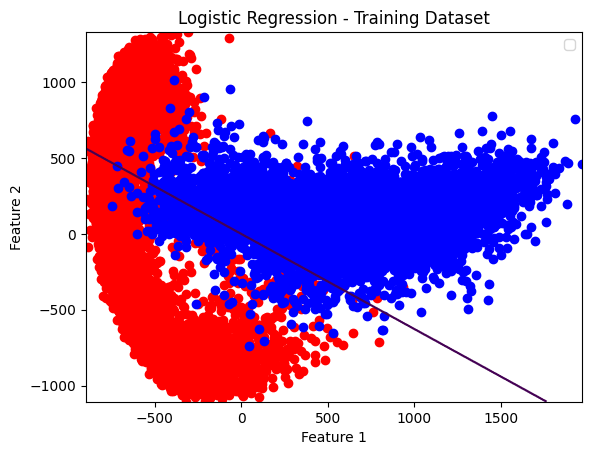

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


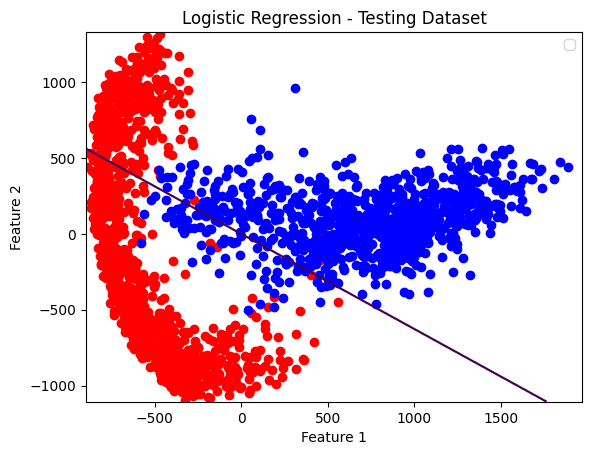

In [22]:
# PLOTTING FOR LOGISTIC REGRESSION ONLY
# plt.contour(px, py, cy.reshape(x1.shape[0], -1),levels=[0])
# plt.scatter(xTrain[yTrain==1][:,1],xTrain[yTrain==1][:,2], color='red')
# plt.scatter(xTrain[yTrain!=1][:,1],xTrain[yTrain!=1][:,2], color='blue')
# plt.title('Logistic Regression - Training Dataset')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()

# plt.contour(px, py, cy.reshape(x1.shape[0], -1),levels=[0])
# plt.scatter(xTest[yTest==1][:,1],xTest[yTest==1][:,2], color='red')
# plt.scatter(xTest[yTest!=1][:,1],xTest[yTest!=1][:,2], color='blue')
# plt.title('Logistic Regression - Testing Dataset')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


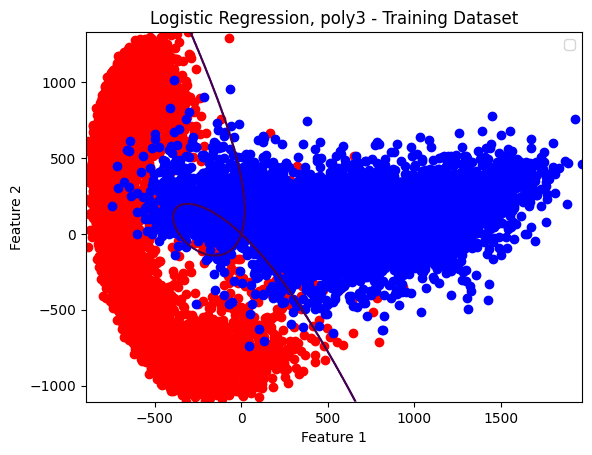

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


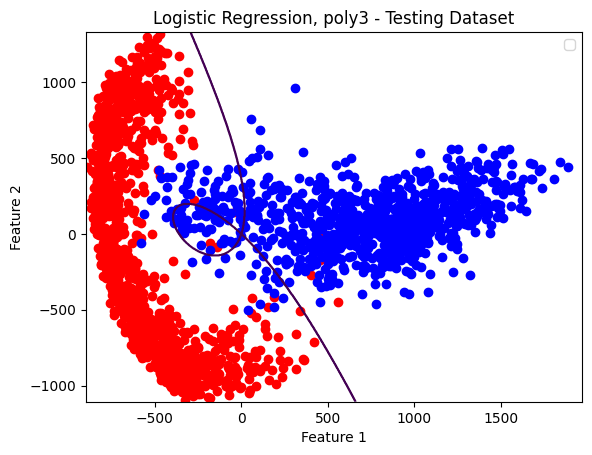

In [45]:
# PLOTTING FOR LOGISTIC REGRESSION + POLY3
plt.contour(px, py, cy.reshape(x1.shape[0], -1),levels=[0])
plt.scatter(xTrain[yTrain==1][:,1],xTrain[yTrain==1][:,2], color='red')
plt.scatter(xTrain[yTrain!=1][:,1],xTrain[yTrain!=1][:,2], color='blue')
plt.title('Logistic Regression, poly3 - Training Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

plt.contour(px, py, cy.reshape(x1.shape[0], -1),levels=[0])
plt.scatter(xTest[yTest==1][:,1],xTest[yTest==1][:,2], color='red')
plt.scatter(xTest[yTest!=1][:,1],xTest[yTest!=1][:,2], color='blue')
plt.title('Logistic Regression, poly3 - Testing Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()